<a href="https://colab.research.google.com/github/sjw9307/AI_Practice/blob/mater/%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B84_1_tangent_line_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 이 문서의 폰트크기는 브라우저 인쇄시 인쇄 배율 80%로 최적화 되어 있음

## 이 부분은 강의 내용과 관계 없지만 여기서부터 실행 시키세요.(Time stamp 프로그램)

In [6]:
import time

# Define the timestamp function
timestamp_a=[]

def timestamp():
    now = time.time()
    now = time.localtime(now)
    timestamp_a.append(now)
    #return 문에 반환값이 없어, now를 반환하여, 타임스탬프 출력이 가능하게 바꾸었습니다.
    return now

# Call the timestamp function and print the result
print(timestamp())

time.struct_time(tm_year=2023, tm_mon=4, tm_mday=14, tm_hour=9, tm_min=4, tm_sec=3, tm_wday=4, tm_yday=104, tm_isdst=0)


# 미분 : 단변수 함수의 접선 그리기

> 1. 단변수 함수의 수치미분 함수와 접선 방정식
> 2. 예제 함수
> 3. 예제 함수의 접선
> 4. 함수의 접선 그리기

- 교재 "2.3절 미분" 내용 참조

In [9]:
# multi line 출력을 위한 셀 -- 필요없으면 아래 두 라인을 주석(#) 처리해서 기능 해제
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
# 팝업 창을 띠우지 않고 주피터 노트북 안에 그림을 그리라는 명령
%matplotlib inline  

import sys, os
import numpy as np
import matplotlib.pyplot as plt

# 1. 단변수 함수의 수치미분 함수와 접선 방정식

## (1) 함수의 수치미분 값 산출 함수

In [25]:
# 함수의 선언 - nummerical_gradient(f,x) 
# f와 x 두 변수를 param 으로 받는다. 
# 그리고, """ ~  """ 사이의 내용을 출력한다.
# h의 값은 1e-4 > 0.0001로 고정이 되어있다.


def numerical_gradient(f, x):
    """
    :param f: function
    :param x: x축 좌표
    :return: f(x)의 기울기 값
    """
    h = 1e-4  # 0.0001
    return f(x + h) - f(x - h) / (2 * h)


## (2)  함수의 접선의 방정식

In [12]:
# 함수의 선언 - tangent_line(f,x) 
# f와 x 두 변수를 param 으로 받는다. 
# 그리고, """ ~  """ 사이의 내용을 출력한다.
# a의 값은 numerical_gradient(f,x) 함수의 결과값을 받는다.
# b의 값은 f(x) -> f 라는 함수에 x 를 넣은 값 - a * x 를 받는다. 


def tangent_line(f, x):
    """
    :param f: 함수
    :param x: x축 좌표
    :param analytic_gradiant : 분석미분식(아래 select 값이 1일 때 사용)
    :param select : 0(수치미분), 1(분석미분)
    :return: 곡선의 접선식 기울기, g(x)=ax + b
    """
    a = numerical_gradient(f, x)
    b = f(x) - a * x
    return a, lambda x: a * x + b

# 2. 예제 함수

- 예제 단변수 함수와  해당 분석적 미분값 산출 함수
- $y = 0.5 (x-1)^2 - 5$
- $dy/dx = x-1$

In [13]:
def fn1(x):
    return 0.5 * (x - 1)**2 - 5

def fn1_analytic_gradient(x):
    return x-1

# 3. 예제  함수 그리기

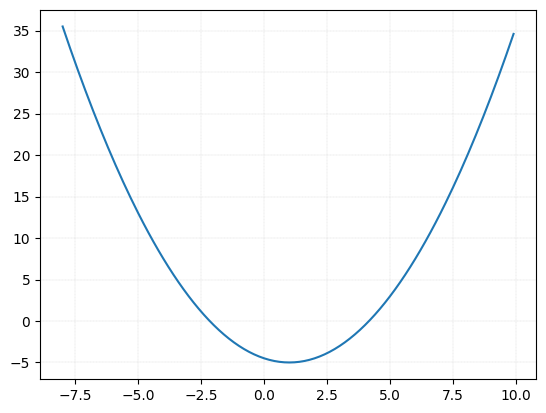

In [14]:
x = np.arange(-8.0, 10.0, 0.1)
y = fn1(x)
plt.plot(x, y, label='0.5(x-1)^2')
plt.grid(color='#BDBDBD', linestyle='--', linewidth=0.2 )
plt.show()

In [ ]:
timestamp()

# 4. 예제 함수 상의 특정 좌표에 대한 접선

## (1)  tangent_line() 함수 사용한 x가 5인 점에서 함수 fn1()의 접선 그리기

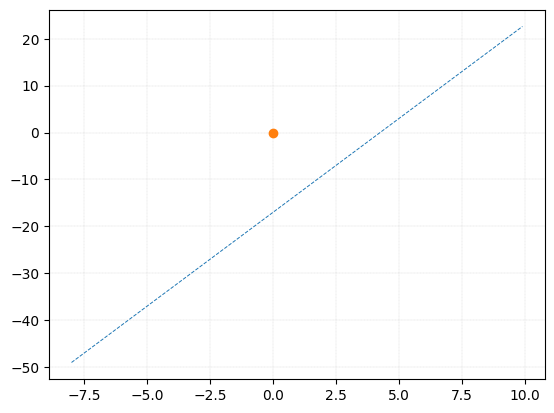

In [15]:
tline_gradient, tline_eq = tangent_line(fn1, 5)

x = np.arange(-8.0, 10.0, 0.1)
y = tline_eq(x)
plt.plot(x, y, linestyle='--',  linewidth=0.7, label="Tangent line at 5 ")
plt.grid(color='#BDBDBD', linestyle='--', linewidth=0.2 )
plt.plot(0, 0, 'o')  # 원점

plt.show()

####  x=5일 일 때, 수치비분과 미분함수 각각에 대한 접선의 기울기 값 비교

In [16]:
print(tline_gradient)               # 접선의 기울기 (수치미분)
print(fn1_analytic_gradient(5))    # 접선의 기울기 (미분함수 버전)

3.9999999999906777
4


In [17]:
timestamp()

time.struct_time(tm_year=2023, tm_mon=4, tm_mday=14, tm_hour=9, tm_min=5, tm_sec=51, tm_wday=4, tm_yday=104, tm_isdst=0)

## (2) 함수의 접선 그리기
-  함수 x가 5일 때 fn1()의 접선을 함수와 함께 그리기

Text(0.5, 1.0, '<NUMERICAL GRADIANT version>')

Text(0.5, 0, 'x')

Text(0, 0.5, 'f(x)')

([<matplotlib.axis.XTick at 0x7f1f52689370>,
 [Text(-10, 0, '−10'),
  Text(-9, 0, '−9'),
  Text(-8, 0, '−8'),
  Text(-7, 0, '−7'),
  Text(-6, 0, '−6'),
  Text(-5, 0, '−5'),
  Text(-4, 0, '−4'),
  Text(-3, 0, '−3'),
  Text(-2, 0, '−2'),
  Text(-1, 0, '−1'),
  Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

(-20.0, 40.0)

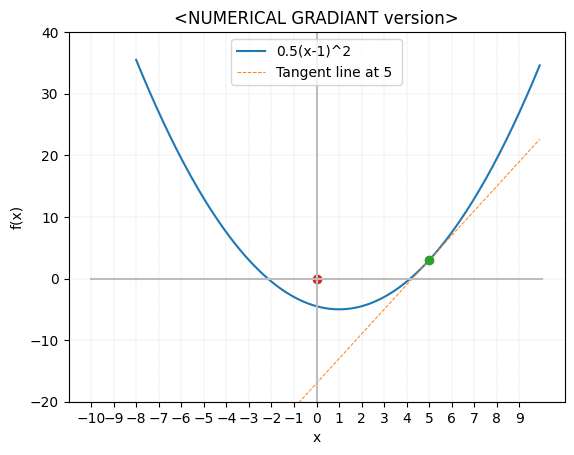

In [18]:
# 함수 그리기
x = np.arange(-8.0, 10.0, 0.1)
y = fn1(x)
plt.plot(x, y, label='0.5(x-1)^2')

# 접선 그리기
tline_gradient, tline_eq = tangent_line(fn1, 5)
y = tline_eq(x)
plt.plot(x, y, linestyle='--',  linewidth=0.7, label="Tangent line at 5 ")
plt.plot(5, tline_eq(5), 'o')
plt.plot(0, 0, 'o')

# ====== 화면에 표시
plt.title("<NUMERICAL GRADIANT version>")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xticks(np.arange(-10, 10))
plt.grid(color='#BDBDBD', linestyle='--', linewidth=0.2 )
plt.plot([-10, 10], [0, 0], '#BDBDBD')  # x-축 라인
plt.plot([0, 0], [-30, 40], '#BDBDBD')  # y-축 라인

plt.legend(loc='upper center')
plt.ylim(-20, 40)  # range of y axis
plt.show()


In [19]:
timestamp()

time.struct_time(tm_year=2023, tm_mon=4, tm_mday=14, tm_hour=9, tm_min=6, tm_sec=14, tm_wday=4, tm_yday=104, tm_isdst=0)

### 이 부분은 강의 내용과 관계 없는 부분이지만 끝까지 실행시키세요(Timestamp와 Mac address hash code 인쇄)

In [20]:
for i in timestamp_a:
    now = time.strftime('%Y년 %#m월 %#d일 %#H시 %#M분 %#S초', i)
    print(now)

2023년 04월 14일 09시 04분 03초
2023년 04월 14일 09시 05분 51초
2023년 04월 14일 09시 06분 14초


In [21]:
from uuid import getnode as get_mac
mac = get_mac()
mac_addr=str(mac)
import hashlib
hash_object= hashlib.sha1(mac_addr.encode('utf-8'))
signature = int(hash_object.hexdigest(), 16) % 10**8
print(str(signature))

54284998
